# Proyek Akhir : Menyelesaikan Permasalahan Perusahaan Edutech


### Nama: Muhammad Rivaldi
### Email: rivalsbr@gmail.com
### Id Dicoding:rivalsbr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Menyiapkan data yang akan digunakan

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd

student_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/student.csv', sep=";")

## Data Understanding

menampilkan sekilas data frame

In [63]:
student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


menampilkan tipe data

In [64]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

menampilkan statistik deskriptif

In [65]:
student_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


menampilkan missing value

In [66]:
student_df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


menampilkan data duplikat

In [67]:
student_df.duplicated().sum()

np.int64(0)

## Data Preparation / Preprocessing

menampilkan nilai unik pada kolom status

In [68]:
student_df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


menghapus kategori enrolled pada kolom status

In [69]:
student_df = student_df[student_df.Status!='Enrolled']

menampilkan distribusi status

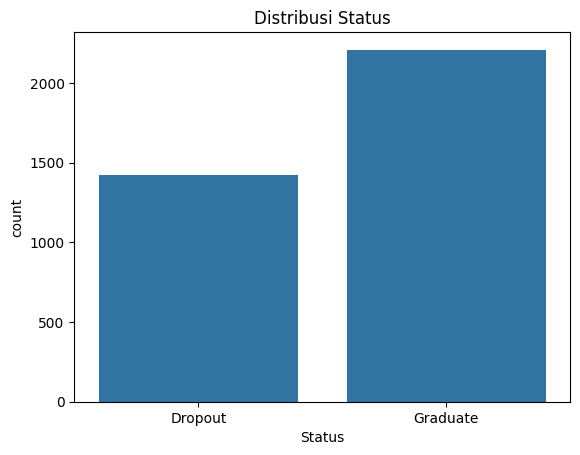

In [70]:
sns.countplot(x='Status', data=student_df)
plt.title('Distribusi Status')
plt.show()

mengubah nilai pada kolom status menjadi numerik

In [71]:
student_df['Status']=student_df['Status'].map({'Dropout':0,
                                                 'Graduate':1
})

<ipython-input-71-49a933720f60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_df['Status']=student_df['Status'].map({'Dropout':0,


menampilkan korelasi antar variabel

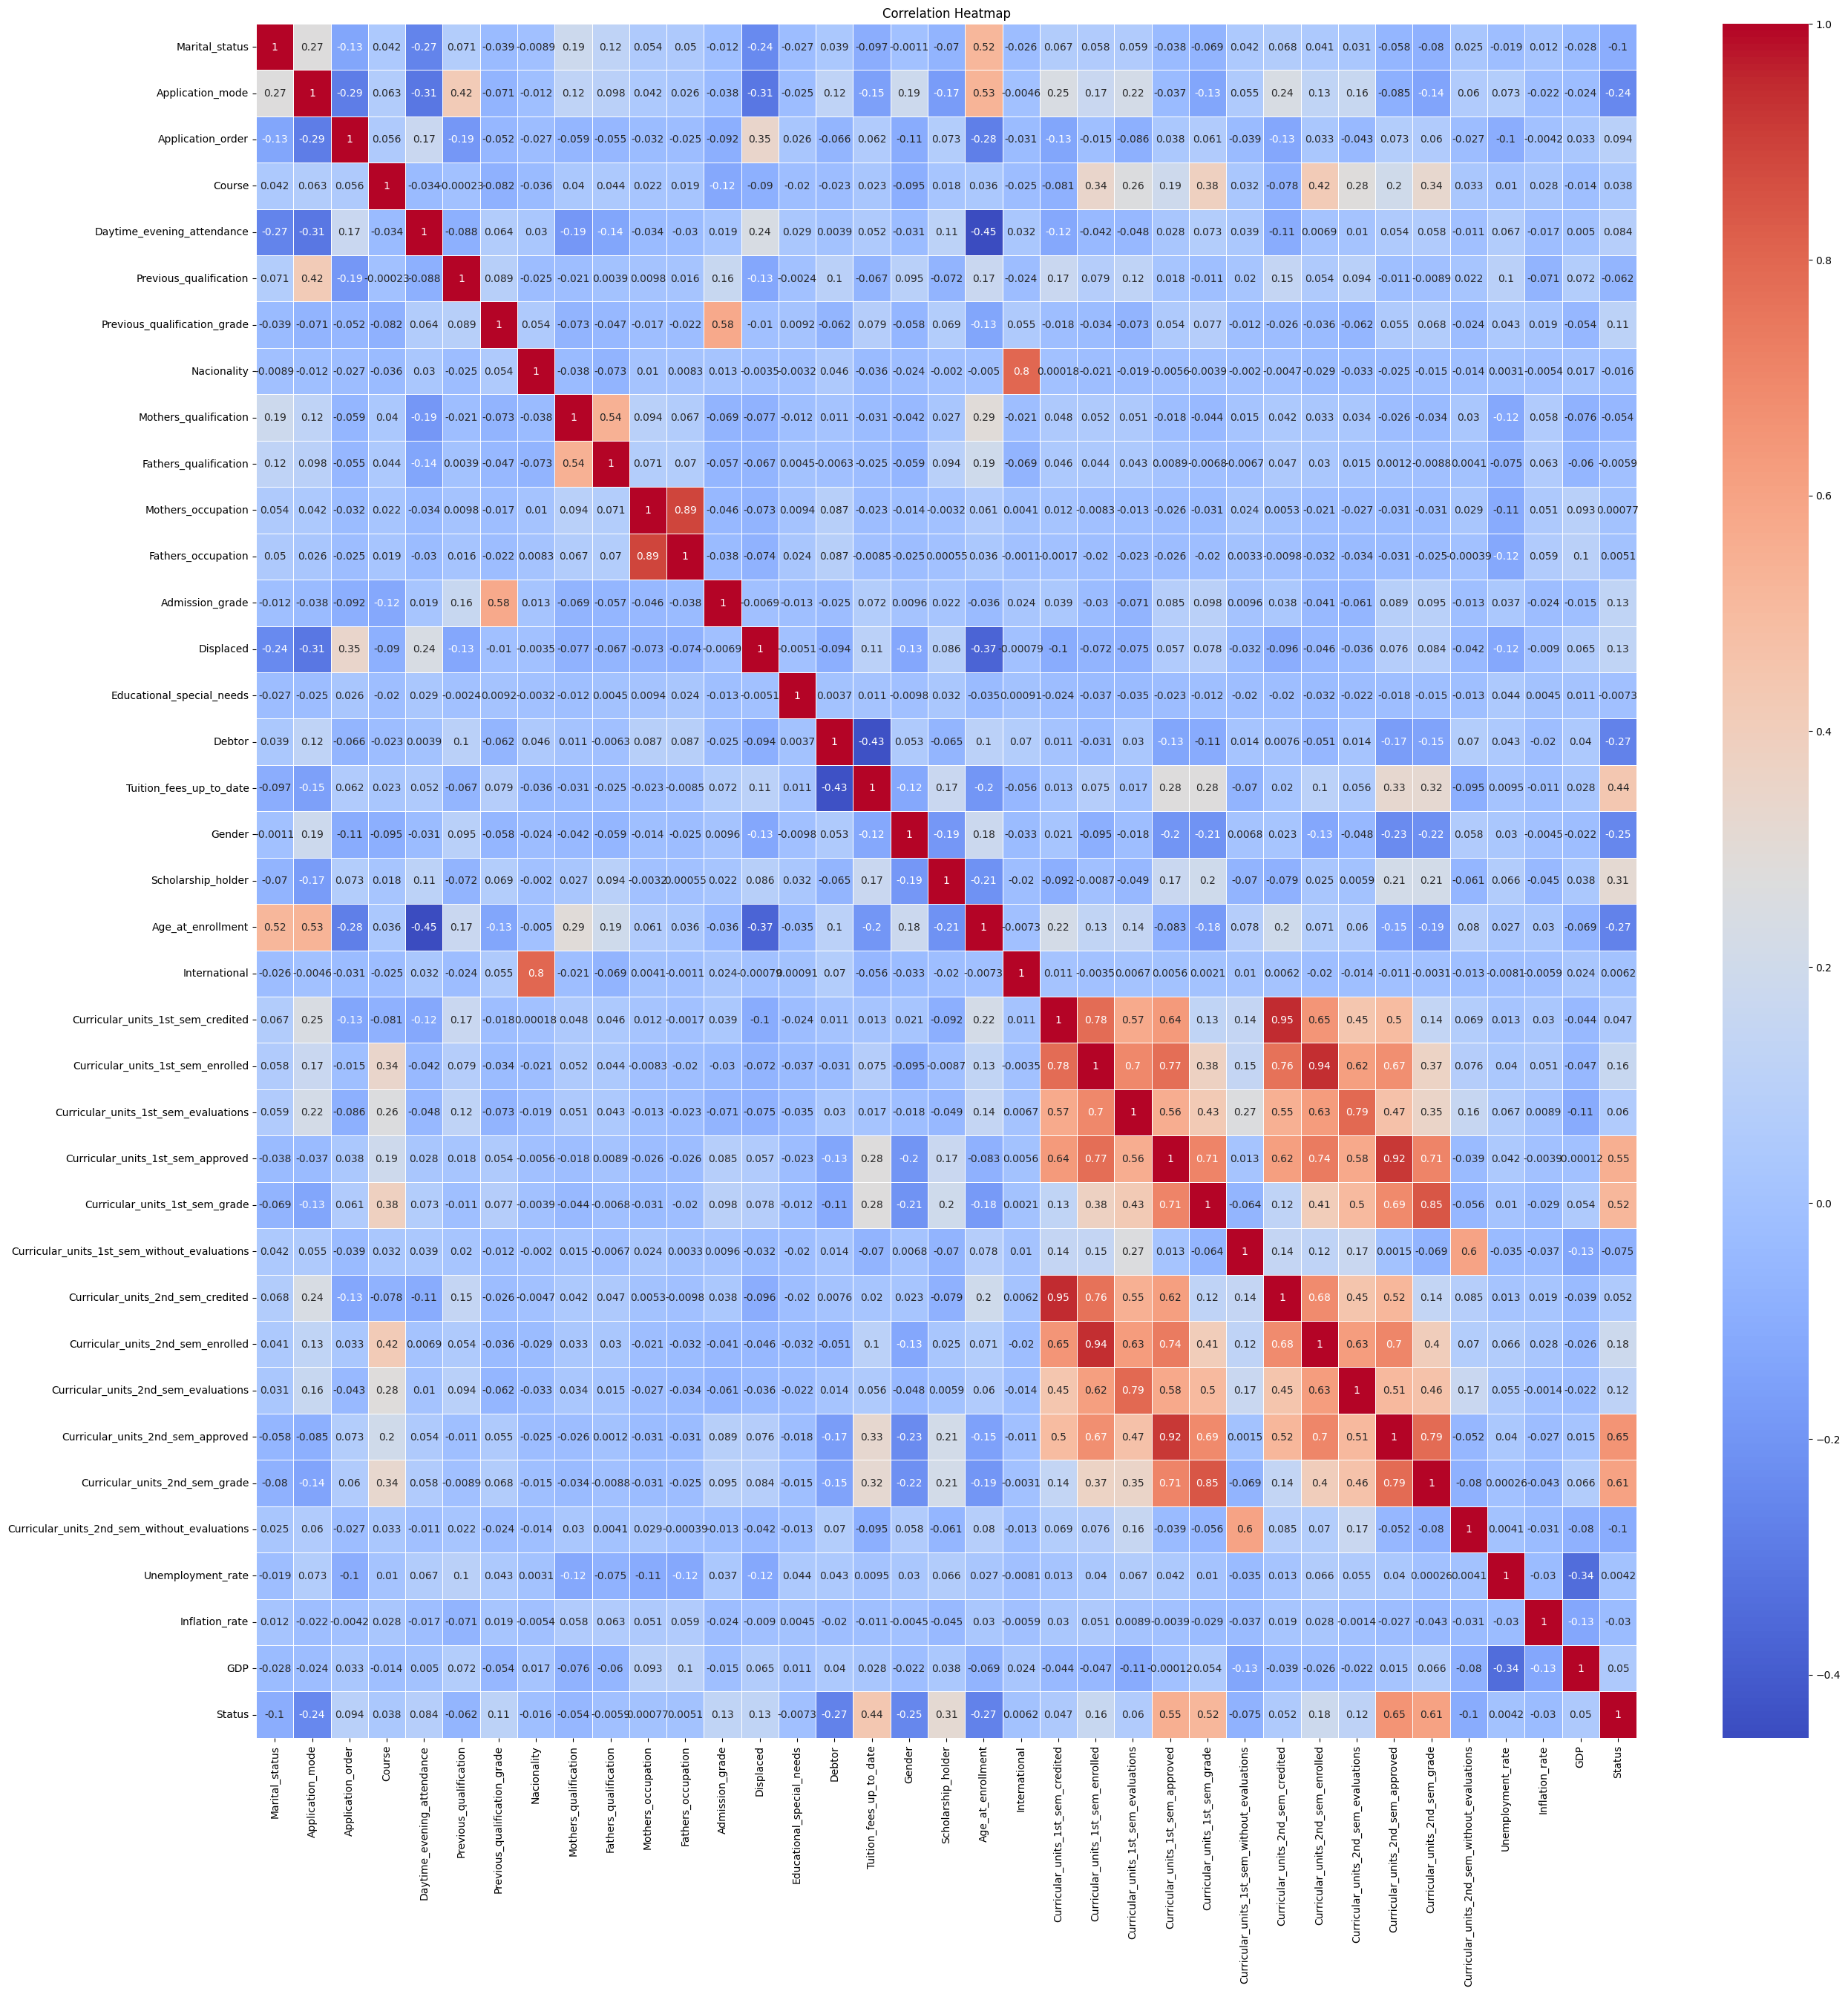

In [72]:
plt.figure(figsize=(30, 30))
sns.heatmap(student_df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [73]:
student_df.corr()['Status']

,Status
Marital_status,-0.100479
Application_mode,-0.244507
Application_order,0.094355
Course,0.038135
Daytime_evening_attendance,0.084496
Previous_qualification,-0.062323
Previous_qualification_grade,0.109464
Nacionality,-0.015516
Mothers_qualification,-0.053989
Fathers_qualification,-0.005865


menghapus kolom dengan korelasi kecil terhadap kolom status

In [74]:
student_df.drop(columns=['Marital_status',
                          'Age_at_enrollment',
                          'Application_mode',
                          'Application_order',
                          'Course',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Unemployment_rate',
                          'Inflation_rate',
                          'GDP'], axis=1, inplace=True)
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   int64  
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   int64  
 4   Debtor                             3630 non-null   int64  
 5   Tuition_fees_up_to_date            3630 non-null   int64  
 6   Gender                             3630 non-null   int64  
 7   Scholarship_holder                 3630 non-null   int64  
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1

mengubah variabel dengan tipe numerik menjadi string

In [75]:
student_df['Gender'] = student_df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
student_df['Displaced'] = student_df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
student_df['Debtor'] = student_df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
student_df['Scholarship_holder'] = student_df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
student_df['Tuition_fees_up_to_date'] = student_df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
student_df['Daytime_evening_attendance'] = student_df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
student_df['Status'] = student_df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})

In [76]:
# Simpan file CSV
student_df.to_csv('student_fix.csv', index=False)

# Download file CSV ke lokal
from google.colab import files
files.download('student_fix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modeling

filter variabel kategori

In [77]:
category_cols = student_df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate


buat direktori model dan melakukan label serta scaling

In [80]:
import os

# Check if the directory already exists
if not os.path.exists("model"):
    os.makedirs("model")
else:
    print("Directory 'model' already exists.")

Directory 'model' already exists.


In [81]:
def save_encoders(features, encoder):
    for feature in features:
        joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

features_to_encode = ['Daytime_evening_attendance',
                     'Displaced',
                     'Debtor',
                     'Tuition_fees_up_to_date',
                     'Gender',
                     'Scholarship_holder']

label_encoder = LabelEncoder()

# Label encode columns and save encoders
for column in features_to_encode:
    student_df[column] = label_encoder.fit_transform(student_df[column])

save_encoders(features_to_encode, label_encoder)

In [82]:
def save_scalers(features, scaler):
    for feature in features:
        joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

features_to_scale = ['Admission_grade',
                     'Previous_qualification_grade',
                     'Curricular_units_1st_sem_approved',
                     'Curricular_units_1st_sem_grade',
                     'Curricular_units_1st_sem_enrolled',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_2nd_sem_approved',
                     'Curricular_units_2nd_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_credited']

scaler = StandardScaler()

# Fit scaler to columns and save scalers
for column in features_to_scale:
    scaled_feature = scaler.fit_transform(student_df[[column]])
    scaled_feature = scaled_feature.reshape(-1, 1)  # Reshape the scaled feature
    student_df[column] = scaled_feature
    save_scalers([column], scaler)

In [83]:
X=np.array(student_df.drop(['Status'],axis=1))
y=np.array(student_df['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2904, 16)
(726, 16)


In [84]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

y_test = encoder.transform(y_test)

### Logistic Regression

In [85]:
# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression()

# Define the grid of hyperparameters
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 150, 250, 400],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_lr_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_lr_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistic Regression is", test_accuracy)


Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
The test accuracy score of Logistic Regression is 0.9077134986225895


### Decision Tree

In [86]:
# Initialize the Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_dt_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_dt_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_dt_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree Classifier is", test_accuracy)


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.8801652892561983


### Random Forest

In [87]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_rf_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_rf_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_rf_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Classifier is", test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
The test accuracy score of Random Forest Classifier is 0.8980716253443526


## Evaluation

### Logistic Regression

In [88]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Logistric Regression:")
print(lr_cm)

Confusion Matrix of Logistric Regression:
[[220  57]
 [ 17 432]]


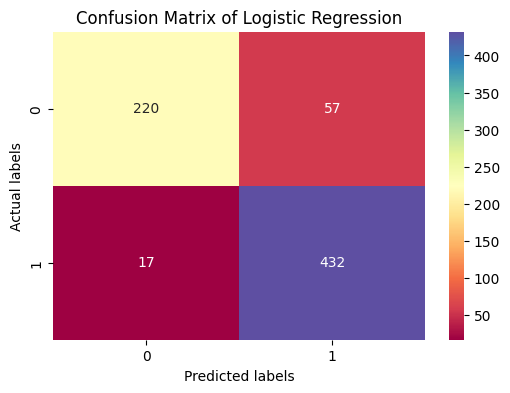

In [89]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [90]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       277
           1       0.88      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



### Decision Tree

In [91]:
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Decision Tree Classifier:")
print(dt_cm)

Confusion Matrix of Decision Tree Classifier:
[[220  57]
 [ 17 432]]


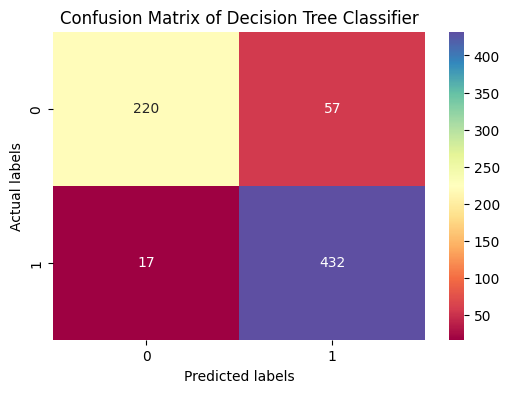

In [92]:
  plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

In [93]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       277
           1       0.88      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



### Random Forest

In [94]:
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)

Confusion Matrix of Random Forest Classifier:
[[220  57]
 [ 17 432]]


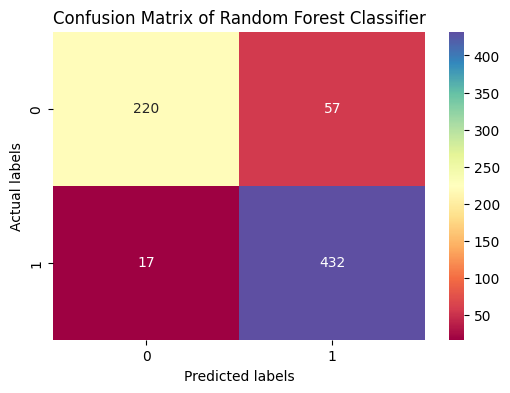

In [95]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [96]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       277
           1       0.88      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



## Deployment

save model logistic regression

In [97]:
joblib.dump(clf_lr_grid, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [98]:
# Load model di enviroment
grid = joblib.load("logistic_regression_model.joblib")

# Simpan ulang hanya model terbaik
joblib.dump(grid.best_estimator_, "logistic_regression_best_model.joblib")

['logistic_regression_best_model.joblib']

uji model

In [99]:
import joblib

# Simpan model dan scaler
joblib.dump(lr_cm, 'lr_dropout_model.pkl')

['lr_dropout_model.pkl']

In [100]:
# Simpan nama kolom yang dipakai dalam model
feature_order = student_df.drop(columns=['Status']).columns.tolist()
joblib.dump(feature_order, "model/feature_order.joblib")

['model/feature_order.joblib']

In [101]:
feature_order = student_df.drop(columns=['Status']).columns.tolist()
joblib.dump(feature_order, 'feature_names.pkl')

['feature_names.pkl']

In [102]:
scaler.fit(student_df[feature_names])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [129]:
import pandas as pd
import numpy as np
import joblib
import os

# Load model dan dependensi
model = joblib.load("logistic_regression_best_model.joblib")
feature_order = joblib.load("model/feature_order.joblib")
label_encoder = joblib.load("model/encoder_target.joblib")

# Contoh data baru (ganti sesuai input)
data_baru = {
    'Gender': ['Yes'],
    'Debtor': ['No'],
    'Scholarship_holder': ['No'],
    'International': ['No'],
    'Application_mode': [1],
    'Application_order': [1],
    'Admission_grade': [140.0],
    'Previous_qualification': [1],
    'Previous_qualification_grade': [120.0],
    'Nacionality': [1],
    'Mother_qualification': [1],
    'Father_qualification': [1],
    'Mother_occupation': [1],
    'Father_occupation': [1],
    'Educational_special_needs': ['No'],
    'Displaced': ['No'],
    'Curricular_units_1st_sem_approved': [5],
    'Curricular_units_1st_sem_grade': [13.5],
    'Curricular_units_1st_sem_enrolled': [6],
    'Curricular_units_1st_sem_credited': [5],
    'Curricular_units_2nd_sem_approved': [4],
    'Curricular_units_2nd_sem_grade': [14.0],
    'Curricular_units_2nd_sem_enrolled': [5],
    'Curricular_units_2nd_sem_credited': [4],
    'Daytime_evening_attendance': ['Yes'],
    'Tuition_fees_up_to_date': ['Yes'],
}

df_baru = pd.DataFrame(data_baru)

# Pastikan urutan kolom sama
df_baru = df_baru[feature_order]

# Cek nilai string yang mencurigakan
print("Nilai unik sebelum encoding:")
for col in df_baru.columns:
    if df_baru[col].dtype == 'object':
        print(f"{col}: {df_baru[col].unique()}")

# Encode kategori
for col in df_baru.select_dtypes(include='object').columns:
    encoder_path = f"model/encoder_{col}.joblib"
    if os.path.exists(encoder_path):
        le = joblib.load(encoder_path)
        df_baru[col] = le.transform(df_baru[col])
    else:
        print(f"[SKIP] Encoder tidak ditemukan untuk kolom: {col}")


# Scale numerik
for col in df_baru.columns:
    scaler_path = f"model/scaler_{col}.joblib"
    if os.path.exists(scaler_path):
        scaler = joblib.load(scaler_path)
        df_baru[col] = scaler.transform(df_baru[[col]])

# Prediksi
prediksi = model.predict(df_baru)
label_prediksi = label_encoder.inverse_transform(prediksi)

print("Prediksi:", label_prediksi[0])

Nilai unik sebelum encoding:
Daytime_evening_attendance: ['Yes']
Displaced: ['No']
Debtor: ['No']
Tuition_fees_up_to_date: ['Yes']
Gender: ['Yes']
Scholarship_holder: ['No']
Prediksi: Graduate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
